In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True) #replacing the categorical data 


In [5]:
data.shape

(614, 13)

In [6]:
data.drop('Loan_ID',axis=1,inplace=True) #drop unnecessary feature


In [7]:
data.isna().sum() #there are nulls present here

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [9]:
#filling all the object datatype with nulls

data.Gender = data.Gender.fillna('none')
data.Married = data.Married.fillna('none')
data.Dependents = data.Dependents.fillna('none')
data.Self_Employed = data.Self_Employed.fillna('none')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [11]:
numerical_column = data.select_dtypes(include=['float64']).columns
numerical_column

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [12]:
#imputing the null values using imputer

imp = SimpleImputer(strategy='mean')
data['LoanAmount'] = imp.fit_transform(data['LoanAmount'].values.reshape(-1, 1) )
data['Loan_Amount_Term'] = imp.fit_transform(data['Loan_Amount_Term'].values.reshape(-1, 1) )
data['Credit_History'] = imp.fit_transform(data['Credit_History'].values.reshape(-1, 1) )




In [13]:
data.isna().sum() #we have treated all the nulls

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#we will drop few features which does not help for any prediction

data.drop('Dependents',axis=1,inplace=True) #drop unnecessary feature
data.drop('Self_Employed',axis=1,inplace=True) #drop unnecessary feature
data.drop('Loan_Amount_Term',axis=1,inplace=True) #drop unnecessary feature
data.drop('Property_Area',axis=1,inplace=True) #drop unnecessary feature


In [15]:
#generating dummy values on the given dataset
data= pd.get_dummies(data).astype(int)
data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_none,Married_No,Married_Yes,Married_none,Education_Graduate,Education_Not Graduate
0,5849,0,146,1,1,0,1,0,1,0,0,1,0
1,4583,1508,128,1,0,0,1,0,0,1,0,1,0
2,3000,0,66,1,1,0,1,0,0,1,0,1,0
3,2583,2358,120,1,1,0,1,0,0,1,0,0,1
4,6000,0,141,1,1,0,1,0,1,0,0,1,0


In [16]:
data.shape

(614, 13)

In [17]:
data.describe() #data is almost clean and shows normal distribution

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_none,Married_No,Married_Yes,Married_none,Education_Graduate,Education_Not Graduate
count,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.397394,0.773616,0.687296,0.182410,0.796417,0.021173,0.346906,0.648208,0.004886,0.781759,0.218241
std,6109.041673,2926.24876,84.037503,0.418832,0.463973,0.386497,0.402991,0.144077,0.476373,0.477919,0.069786,0.413389,0.413389
min,150.000000,0.00000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.00000,100.250000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3812.500000,1188.50000,129.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5795.000000,2297.25000,164.750000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,81000.000000,41667.00000,700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
cor = data.corr()
cor


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_none,Married_No,Married_Yes,Married_none,Education_Graduate,Education_Not Graduate
ApplicantIncome,1.000000,-0.116604,0.565621,0.006986,-0.004710,-0.058809,0.013933,0.118787,-0.051708,0.050194,0.009224,0.140760,-0.140760
CoapplicantIncome,-0.116604,1.000000,0.187863,-0.058796,-0.059188,-0.082912,0.082316,-0.007824,-0.075947,0.080496,-0.032830,0.062290,-0.062290
LoanAmount,0.565621,0.187863,1.000000,-0.034518,-0.036345,-0.107909,0.064579,0.108841,-0.147131,0.145647,0.006901,0.167041,-0.167041
Credit_History,0.006986,-0.058796,-0.034518,1.000000,0.432616,-0.026655,0.035780,-0.028575,0.018150,-0.023626,0.037905,0.081637,-0.081637
Loan_Status,-0.004710,-0.059188,-0.036345,0.432616,1.000000,-0.017987,0.025407,-0.022814,-0.091478,0.084281,0.047264,0.085884,-0.085884
Gender_Female,-0.058809,-0.082912,-0.107909,-0.026655,-0.017987,1.000000,-0.934236,-0.069469,0.364569,-0.367389,0.027384,0.045364,-0.045364
Gender_Male,0.013933,0.082316,0.064579,0.035780,0.025407,-0.934236,1.000000,-0.290893,-0.336818,0.339026,-0.022579,-0.061497,0.061497
Gender_none,0.118787,-0.007824,0.108841,-0.028575,-0.022814,-0.069469,-0.290893,1.000000,-0.035885,0.037273,-0.010306,0.050318,-0.050318
Married_No,-0.051708,-0.075947,-0.147131,0.018150,-0.091478,0.364569,-0.336818,-0.035885,1.000000,-0.989310,-0.051069,0.012304,-0.012304
Married_Yes,0.050194,0.080496,0.145647,-0.023626,0.084281,-0.367389,0.339026,0.037273,-0.989310,1.000000,-0.095116,-0.017671,0.017671


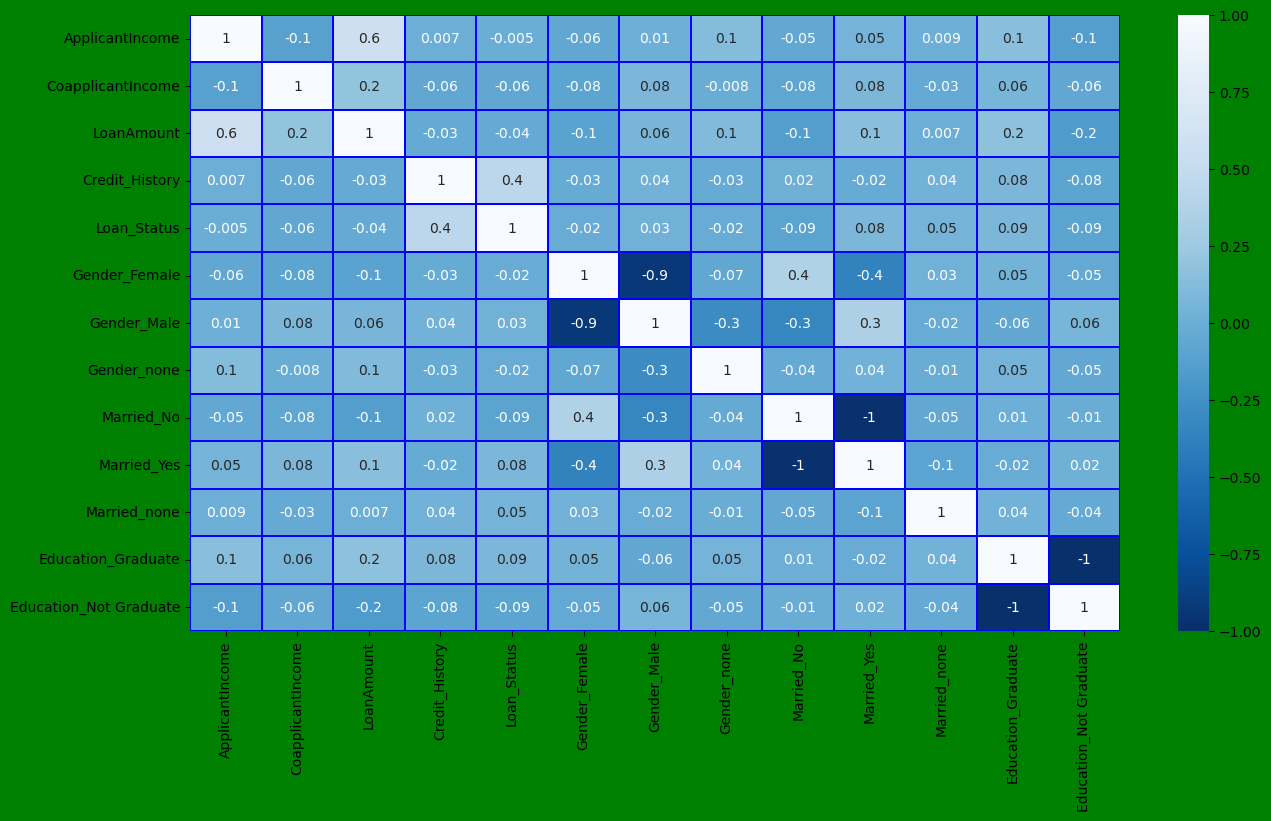

In [19]:
#we will use heatmap to check the multicollinearity
plt.figure(figsize=(15,8), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

Through heatmap we can see that there are no multicollinearity issue found

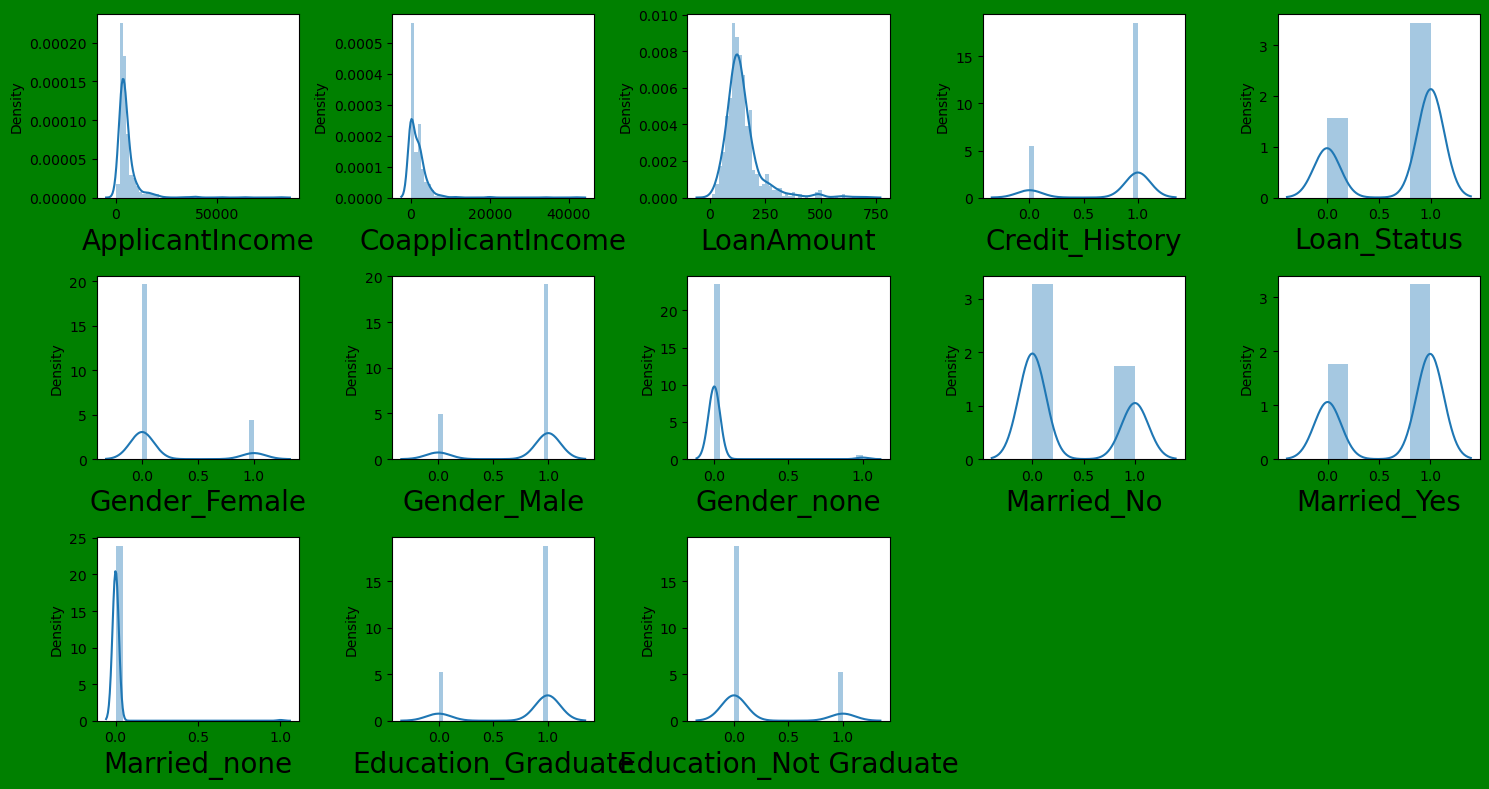

In [20]:
plt.figure(figsize=(15,8), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=25:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

there is skewness detected in the above distplot so we will try to control it 

In [21]:
data.skew() 

ApplicantIncome            6.539513
CoapplicantIncome          7.491530
LoanAmount                 2.727127
Credit_History            -1.310835
Loan_Status               -0.809998
Gender_Female              1.648795
Gender_Male               -1.475893
Gender_none                6.668550
Married_No                 0.644850
Married_Yes               -0.622252
Married_none              14.235914
Education_Graduate        -1.367622
Education_Not Graduate     1.367622
dtype: float64

In [22]:
#we will reduce the skewness through cube root method

data['ApplicantIncome']=np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome']=np.cbrt(data['CoapplicantIncome'])
data['LoanAmount']=np.cbrt(data['LoanAmount'])
data['Gender_none']=np.cbrt(data['Gender_none'])
data['Married_none']=np.cbrt(data['Married_none'])
data['Credit_History']=np.cbrt(data['Credit_History'])
data['Gender_Female']=np.cbrt(data['Gender_Female'])
data['Gender_Male']=np.cbrt(data['Gender_Male'])
data['Education_Graduate']=np.cbrt(data['Credit_History'])
data['Education_Not Graduate']=np.cbrt(data['Education_Not Graduate'])


In [23]:
data.skew()

ApplicantIncome            2.083638
CoapplicantIncome          0.196729
LoanAmount                 0.833534
Credit_History            -1.310835
Loan_Status               -0.809998
Gender_Female              1.648795
Gender_Male               -1.475893
Gender_none                6.668550
Married_No                 0.644850
Married_Yes               -0.622252
Married_none              14.235914
Education_Graduate        -1.310835
Education_Not Graduate     1.367622
dtype: float64

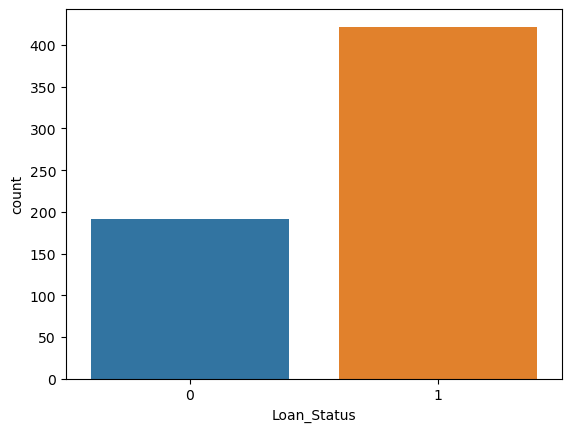

In [24]:
sns.countplot(x='Loan_Status', data=data)
plt.show()


From the above graph we can visualize that there are less no of people who are not eligible for the loan

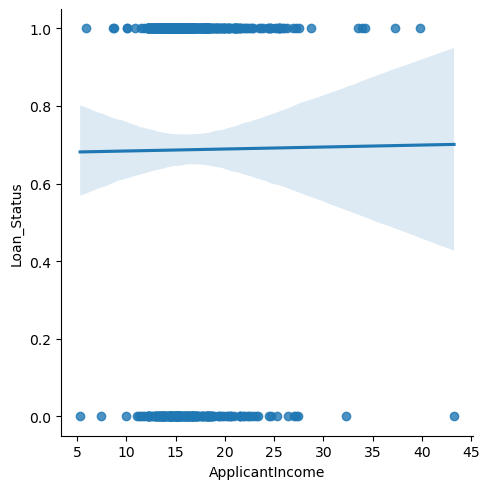

In [25]:
sns.lmplot(x='ApplicantIncome',y='Loan_Status',data=data,palette='colorblind')


From the above graph we can see that the higher the ApplicantIncome will be the higher will be the chances of his eligibility

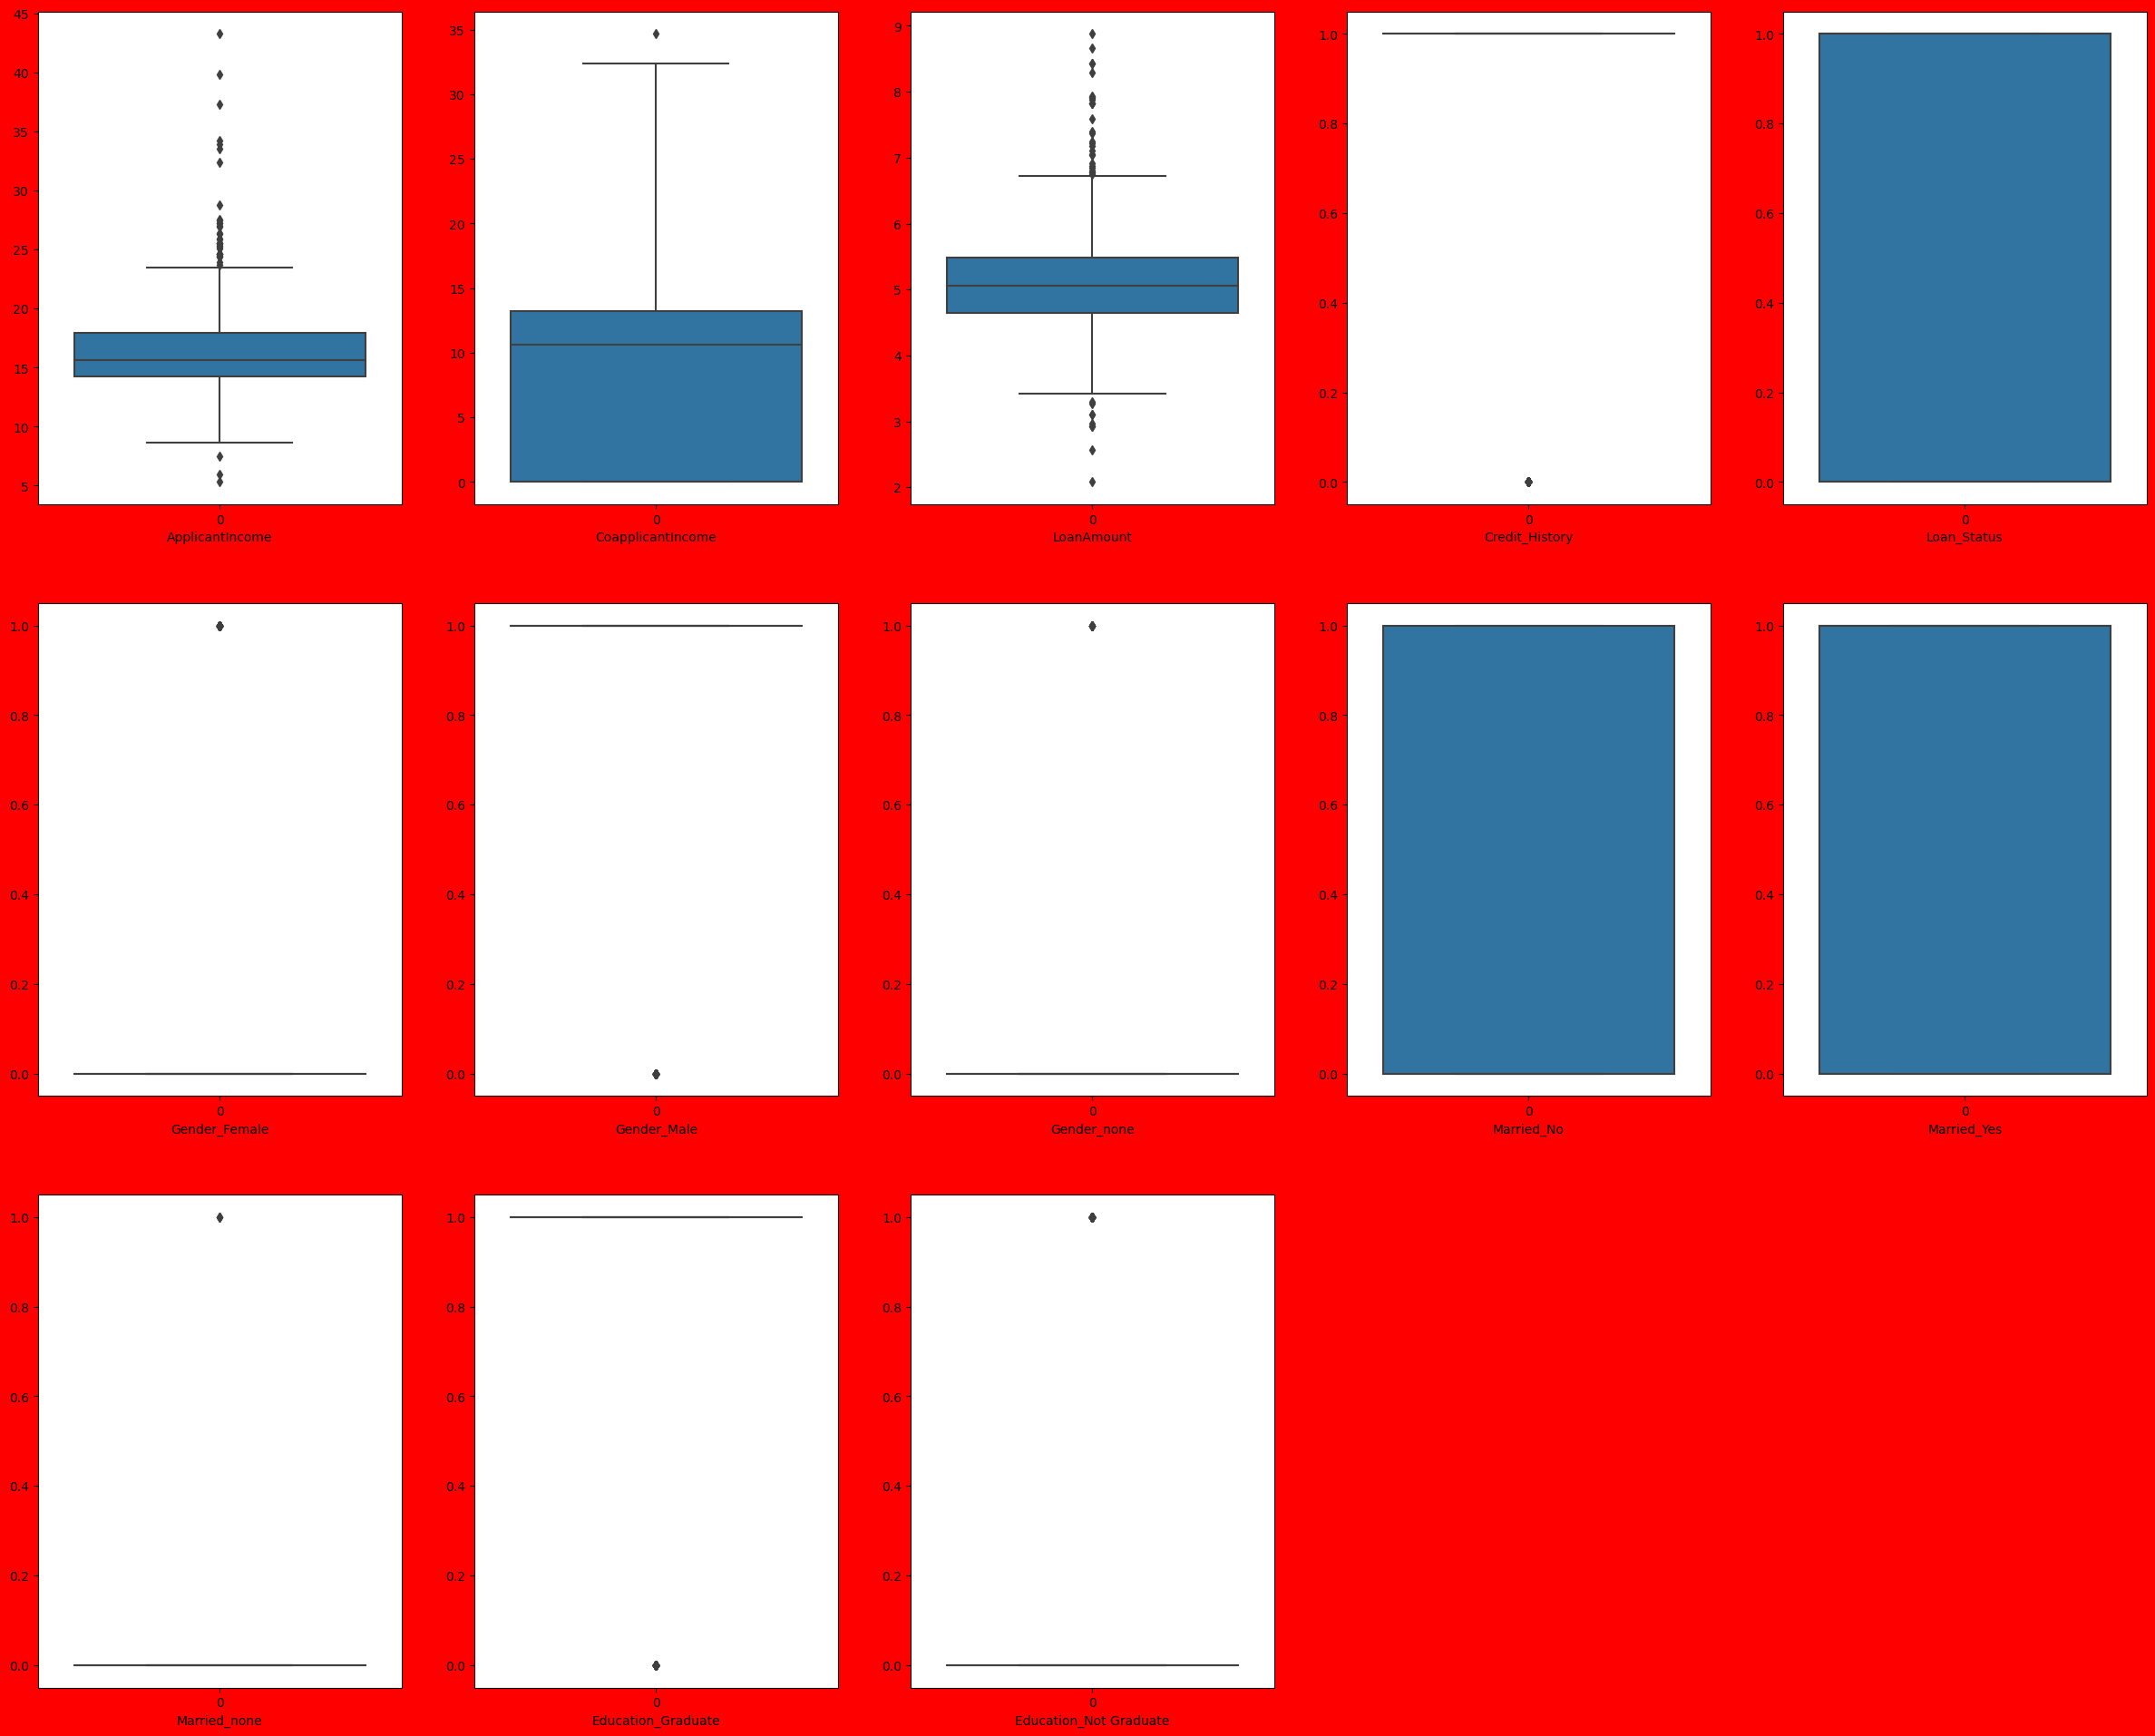

In [26]:
plt.figure(figsize=(30,24), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=50:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()


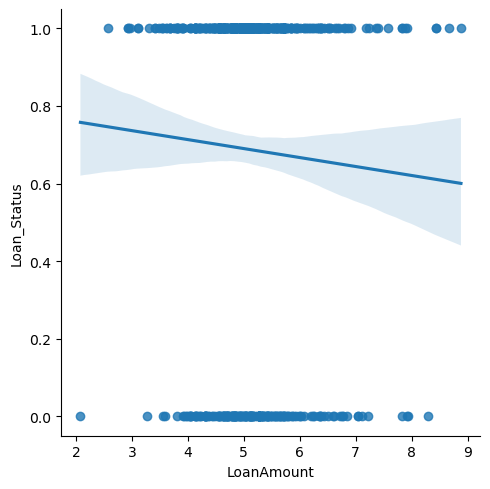

In [27]:
sns.lmplot(x='LoanAmount',y='Loan_Status',data=data,palette='colorblind')


from the above graph we can see that the higher will be the loan amount the lesser the chance will be for his loan approval

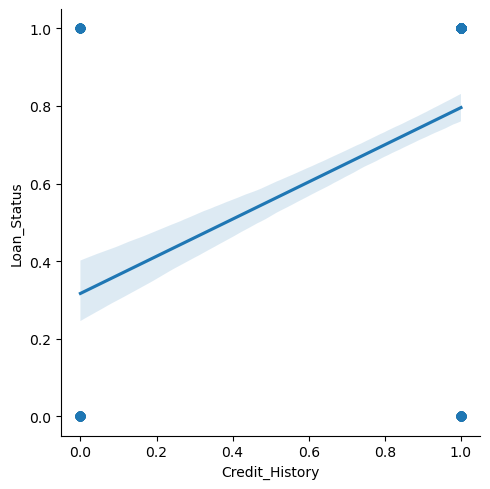

In [28]:
sns.lmplot(x='Credit_History',y='Loan_Status',data=data,palette='colorblind')


The credit history or the civil score bank checks for approving the loan the better the credit history the higher is the chance for the approval

In [29]:
#splitting the data into feature and target variable

y = data['Loan_Status']
x = data.drop(columns = ['Loan_Status'])

In [30]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # We are able to tackle the issue of biasness through standard scalar method


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [32]:
#splitting the data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 40)


In [33]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [34]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)

ExtraTreesClassifier()

In [35]:
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.7297297297297297
[[ 21  33]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.55      0.39      0.46        54
           1       0.78      0.87      0.82       131

    accuracy                           0.73       185
   macro avg       0.66      0.63      0.64       185
weighted avg       0.71      0.73      0.71       185



here in the ET model we could see that the accuracy score for the test data is 72% which is a good score means our data is trained 

In [36]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [37]:
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7405405405405405
[[ 19  35]
 [ 13 118]]
              precision    recall  f1-score   support

           0       0.59      0.35      0.44        54
           1       0.77      0.90      0.83       131

    accuracy                           0.74       185
   macro avg       0.68      0.63      0.64       185
weighted avg       0.72      0.74      0.72       185



here in the RFC model we could see that the accuracy score for the test data is 74% which is a good score means our data is trained 

In [38]:
import joblib
joblib.dump(RFC, 'loan_application_status.pkl') #saving the model


['loan_application_status.pkl']

In [39]:
RFC = joblib.load('loan_application_status.pkl')

prediction = RFC.predict(x_test)
prediction


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1])

In [40]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a              #here 0 is Loan status as 'No' and 1 is loan status as 'Yes'
data


,Predicted,Actual
0,1,1
1,0,1
2,1,0
3,1,1
4,1,1
...,...,...
180,0,1
181,1,1
182,1,0
183,1,1
